<a href="https://colab.research.google.com/github/golden7187/stock-market/blob/main/stock_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-27'
stock = 'GOOG'
data = yf.download (stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800
2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20336400


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
2760,2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800
2761,2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20336400
2762,2022-12-22,88.930000,89.180000,86.940002,88.260002,88.260002,23656100


In [6]:
ma_100_days = data.Close.rolling (100).mean()

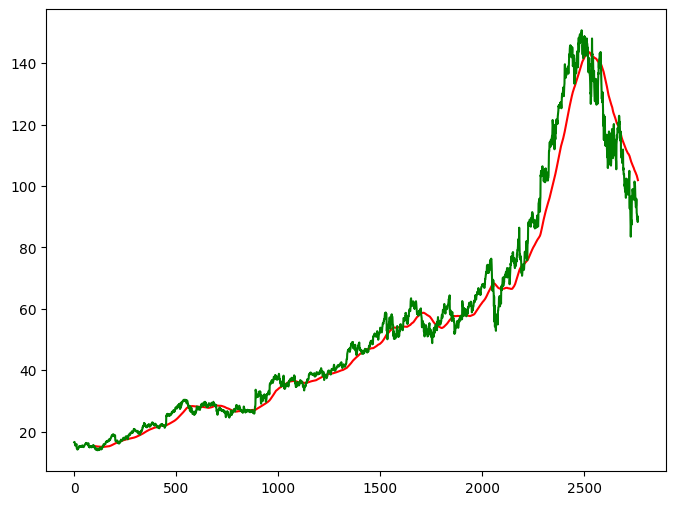

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling (200). mean()

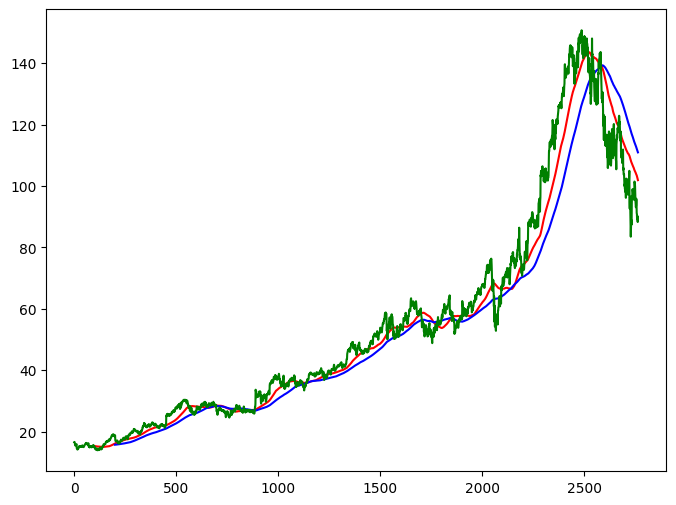

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data. Close, 'g')
plt.show()

In [10]:
data.dropna (inplace=True)

In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])

data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])



In [42]:
data_train.shape[0]

2211

In [43]:
data_test.shape[0]


553

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))



In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [48]:

x = []
y = []

for i in range(100, data_train_scale.shape[0]):
   x.append(data_train_scale [i-100: i])
   y.append(data_train_scale[i,0])


In [49]:
x, y = np.array(x), np.array(y)

In [50]:
 from keras.layers import Dense, Dropout, LSTM
 from keras.models import Sequential

In [55]:

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [57]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [58]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 [==============================] - 57s 772ms/step - loss: 0.0368
Epoch 2/50
66/66 [==============================] - 48s 723ms/step - loss: 0.0070
Epoch 3/50
66/66 [==============================] - 51s 770ms/step - loss: 0.0061
Epoch 4/50
66/66 [==============================] - 46s 696ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 45s 679ms/step - loss: 0.0053
Epoch 6/50
66/66 [==============================] - 46s 693ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 45s 676ms/step - loss: 0.0047
Epoch 8/50
66/66 [==============================] - 46s 700ms/step - loss: 0.0050
Epoch 9/50
66/66 [==============================] - 44s 667ms/step - loss: 0.0042
Epoch 10/50
66/66 [==============================] - 46s 687ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 46s 705ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 45s 686ms/step - loss: 0.0045
Epoch 13/50
6

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [60]:
pas_100_days= data_train.tail (100)


In [61]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)


In [62]:
data_test_scale = scaler.fit_transform(data_test)

In [63]:
x = []

y = []

for i in range(100, data_test_scale.shape[0]):
   x.append(data_test_scale [i-100: i])
   y.append(data_test_scale [i,0])
x, y = np.array(x), np.array(y)

In [64]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 64ms/step


In [65]:
scale =1/scaler.scale_


In [66]:
y_predict = y_predict*scale


In [67]:
y = y*scale

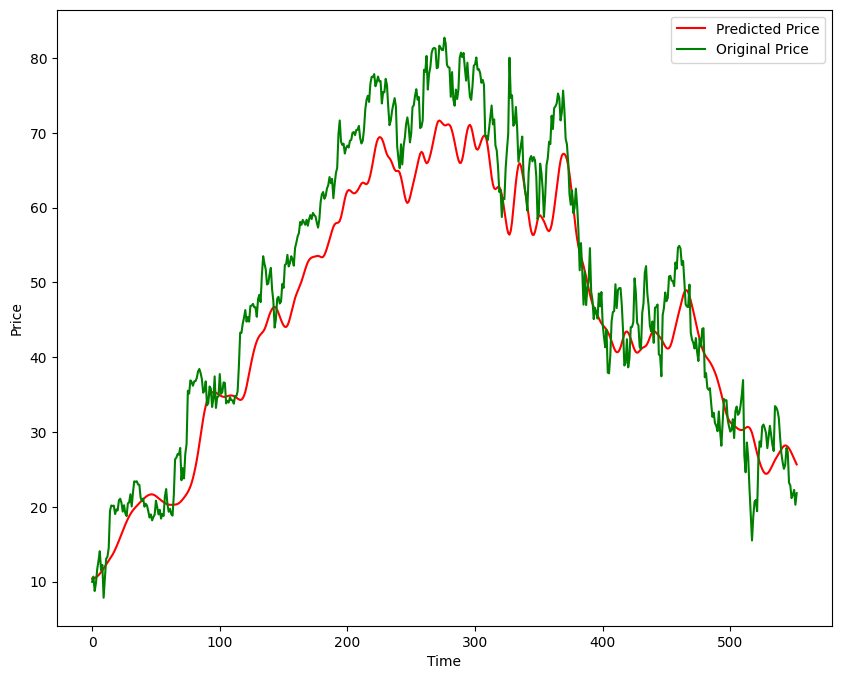

In [68]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
model.save('stock prediction model.keras')